## Análisis de clientes bancarios

El dataset parece estar relacionado con el análisis de clientes bancarios, específicamente en el contexto de renegociación de deudas. La columna RENE_FINAL es la variable objetivo, indicando si un cliente ha tomado (1) o no ha tomado (0) una renegociación de su deuda en los proximos 3 meses post monto ofertado. Las demás columnas representan características bancarias y financieras de cada cliente, que se utilizarán como variables independientes para predecir la probabilidad de renegociación.

ABONO_OFERTADO: Monto ofertado para renegociar

CONSUMO_SBIF: Deuda que tiene el cliente en creditos de consumo en la CMF

EDAD: edad del cliente

SEXO_BIN: Marca genero (1:Femenino, 0: Masculino)

SCORE: score de riesgo

DEUDA_PROM3	: deuda promedio ultimos 3 meses en la CMF/SBIF

PROME_UTILIZACION_3MESES	: promedio utilizacion ultimos 3 meses (deuda/linea credito)

PROME_LINEA_CREDITO_3MESES: promedio linea de credito reportado en la CMF en los ultimos 3 meses

PROME_CANT_INSTITU_3MESES	: Promedio instituciones a las que les adeuda el cliente en los ultimos 3 meses.

SUMA_MOROSA_3MESES: suma deuda morosa reportada por la CMF en los ultimos 3 meses

Deuda_Char_008	: Decremento Saldos Ult 12 meses

Pago_Char_008: Porcentaje Pago vs Deuda

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Cargar los datos
data = pd.read_csv('../data/renegociaciones.csv', sep=';')
data.head(3)


,RENE_FINAL,ABONO_OFERTADO,CONSUMO_SBIF,EDAD,SEXO_BIN,SCORE,DEUDA_PROM3,PROME_UTILIZACION_3MESES,PROME_LINEA_CREDITO_3MESES,PROME_CANT_INSTITU_3MESES,SUMA_MOROSA_3MESES,Deuda_Char_008,Pago_Char_008
0,0,11380.0,5138,47.0,1.0,399,206262,0.936667,477,5,1671,4,0
1,0,162817.0,14145,34.0,0.0,456,1337596,0.916667,1121,4,323,2,5
2,0,40480.0,206,75.0,1.0,521,170234,0.870000,25,1,0,6,16


In [2]:
data['RENE_FINAL'].value_counts()

RENE_FINAL
0    48356
1    10384
Name: count, dtype: int64

In [3]:

# Conteo de valores nulos por columna
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((data.isnull().sum() / len(data)) * 100)




Valores nulos por columna:
RENE_FINAL                       0
ABONO_OFERTADO                1482
CONSUMO_SBIF                     0
EDAD                             1
SEXO_BIN                         1
SCORE                            0
DEUDA_PROM3                      0
PROME_UTILIZACION_3MESES         0
PROME_LINEA_CREDITO_3MESES       0
PROME_CANT_INSTITU_3MESES        0
SUMA_MOROSA_3MESES               0
Deuda_Char_008                   0
Pago_Char_008                    0
dtype: int64

Porcentaje de valores nulos por columna:
RENE_FINAL                    0.000000
ABONO_OFERTADO                2.522983
CONSUMO_SBIF                  0.000000
EDAD                          0.001702
SEXO_BIN                      0.001702
SCORE                         0.000000
DEUDA_PROM3                   0.000000
PROME_UTILIZACION_3MESES      0.000000
PROME_LINEA_CREDITO_3MESES    0.000000
PROME_CANT_INSTITU_3MESES     0.000000
SUMA_MOROSA_3MESES            0.000000
Deuda_Char_008                0.0

In [4]:
data = data.dropna()
data.shape


(57257, 13)

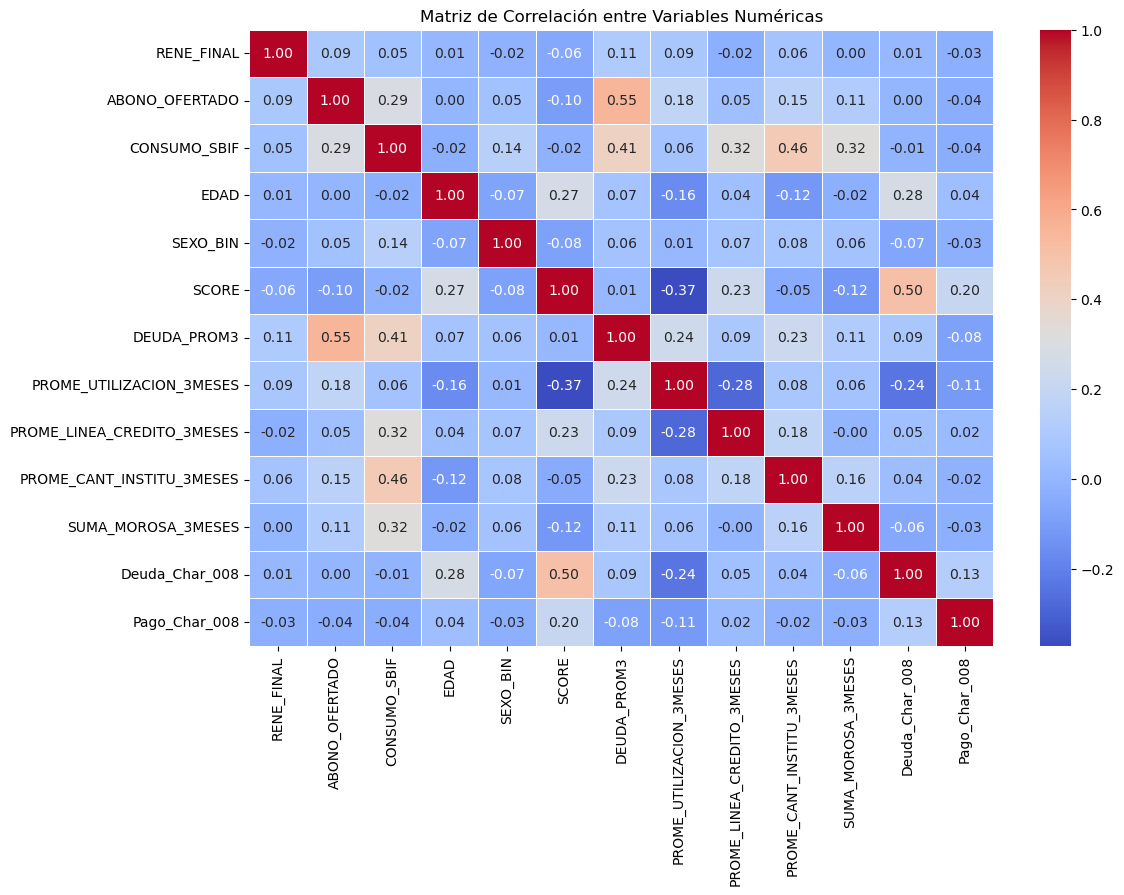

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para la matriz de correlación
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


In [6]:
data.columns

Index(['RENE_FINAL', 'ABONO_OFERTADO', 'CONSUMO_SBIF', 'EDAD', 'SEXO_BIN',
       'SCORE', 'DEUDA_PROM3', 'PROME_UTILIZACION_3MESES',
       'PROME_LINEA_CREDITO_3MESES', 'PROME_CANT_INSTITU_3MESES',
       'SUMA_MOROSA_3MESES', 'Deuda_Char_008', 'Pago_Char_008'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

# Supongamos que 'target' es la columna objetivo; reemplázala con el nombre correcto
target = 'RENE_FINAL'  # Cambia esto a la variable objetivo que estás usando
features = data.drop(columns=[target])
labels = data[target]

# Dividir entre conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

In [8]:
from sklearn.utils import resample

# Combinar X_train e y_train para equilibrar las clases
train_data = pd.concat([X_train, y_train], axis=1)

# Dividir en clases mayoritaria y minoritaria
majority_class = train_data[train_data[target] == 0]  # Asumiendo que 0 es la clase mayoritaria
minority_class = train_data[train_data[target] == 1]  # Asumiendo que 1 es la clase minoritaria

# Balancear la clase mayoritaria usando submuestreo
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combinar de nuevo para tener un conjunto de entrenamiento balanceado
balanced_train_data = pd.concat([majority_downsampled, minority_class])

# Separar características y etiquetas después del balanceo
X_train_balanced = balanced_train_data.drop(columns=[target])
y_train_balanced = balanced_train_data[target]


In [9]:
X_train_balanced.shape

(14244, 12)

In [10]:
# Inicializar el escalador
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento balanceado
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Convertir a DataFrame y mantener los nombres de las columnas
X_train_balanced_scaled = pd.DataFrame(X_train_balanced_scaled, columns=X_train_balanced.columns)

# Transformar el conjunto de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame y mantener los nombres de las columnas
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)




In [11]:
# Entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train_balanced, y_train_balanced)

# Evaluar en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)
print("Resultados de la Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Exactitud:", accuracy_score(y_test, y_pred_log_reg))


Resultados de la Regresión Logística:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      9672
           1       0.23      0.43      0.30      1780

    accuracy                           0.69     11452
   macro avg       0.55      0.59      0.55     11452
weighted avg       0.78      0.69      0.72     11452

Exactitud: 0.6924554662940972


/opt/homebrew/Caskroom/miniforge/base/envs/uai310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


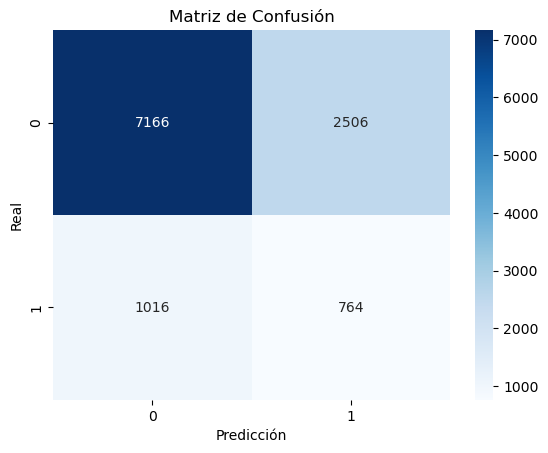

Precisión test: 0.23
Recall test: 0.43
F1-Score test: 0.30
Exactitud (Accuracy) test: 0.69


In [12]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score # Import necessary functions

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# Calcular las métricas
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
accuracy = accuracy_score(y_test, y_pred_log_reg)

# Mostrar los resultados
print(f"Precisión test: {precision:.2f}")
print(f"Recall test: {recall:.2f}")
print(f"F1-Score test: {f1:.2f}")
print(f"Exactitud (Accuracy) test: {accuracy:.2f}")

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Añadir el intercepto a X
X = sm.add_constant(X_train_balanced)

# Crear y ajustar el modelo
log_reg = sm.Logit(y_train_balanced, X)
result = log_reg.fit()

# Mostrar el resumen de los coeficientes
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.669611
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             RENE_FINAL   No. Observations:                14244
Model:                          Logit   Df Residuals:                    14231
Method:                           MLE   Df Model:                           12
Date:                Thu, 03 Apr 2025   Pseudo R-squ.:                 0.03396
Time:                        03:25:58   Log-Likelihood:                -9537.9
converged:                       True   LL-Null:                       -9873.2
Covariance Type:            nonrobust   LLR p-value:                9.094e-136
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4786      0.240      1.993      0.046      

In [14]:
# X_train_balanced = X_train_balanced.drop(columns=['CONSUMO_SBIF'])
# X_test = X_test.drop(columns=['CONSUMO_SBIF'])


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de hiperparámetros para buscar
param_grid = {
    'max_depth': [3, 5, 7, 10,20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configurar el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1) #Indica que se deben usar todos los núcleos de CPU disponibles en la máquina para ejecutar las tareas en paralelo. Esto es útil para maximizar el uso de recursos y acelerar el proceso.

# Ejecutar la búsqueda de hiperparámetros en el conjunto de datos balanceado de entrenamiento
grid_search.fit(X_train_balanced, y_train_balanced)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de exactitud:", grid_search.best_score_)


Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mejor puntuación de exactitud: 0.5930911595237439


In [16]:
# Crear el modelo con los mejores parámetros
best_tree = grid_search.best_estimator_

# Ajustar el modelo al conjunto de entrenamiento
best_tree.fit(X_train_balanced, y_train_balanced)

# Evaluar el modelo en el conjunto de prueba
y_pred_best_tree = best_tree.predict(X_test)
print("Resultados del Mejor Árbol de Decisión:")
print(classification_report(y_test, y_pred_best_tree))
print("Exactitud:", accuracy_score(y_test, y_pred_best_tree))


Resultados del Mejor Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.92      0.35      0.51      9672
           1       0.19      0.83      0.31      1780

    accuracy                           0.43     11452
   macro avg       0.56      0.59      0.41     11452
weighted avg       0.81      0.43      0.48     11452

Exactitud: 0.427348934683898


Características más relevantes según el Árbol de Decisión:
                       Feature  Importance
5                  DEUDA_PROM3    0.377067
11               Pago_Char_008    0.197840
4                        SCORE    0.127979
10              Deuda_Char_008    0.063671
9           SUMA_MOROSA_3MESES    0.057592
6     PROME_UTILIZACION_3MESES    0.052687
1                 CONSUMO_SBIF    0.038843
0               ABONO_OFERTADO    0.033598
7   PROME_LINEA_CREDITO_3MESES    0.029754
3                     SEXO_BIN    0.017163
8    PROME_CANT_INSTITU_3MESES    0.003805
2                         EDAD    0.000000


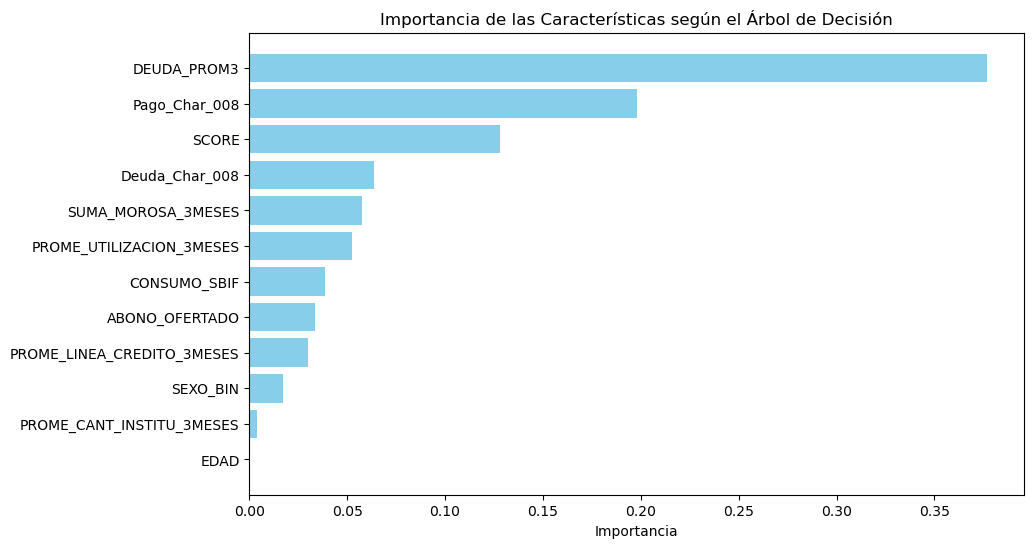

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las importancias de las características del mejor modelo
feature_importances = best_tree.feature_importances_

# Assuming 'features' is a DataFrame, get the column names as a list

features = X_train_balanced.columns.tolist()  # Get the column names from the DataFrame

# Crear un DataFrame con las características y sus importancias
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar las características por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print("Características más relevantes según el Árbol de Decisión:")
print(importance_df)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de las Características según el Árbol de Decisión')
plt.show()

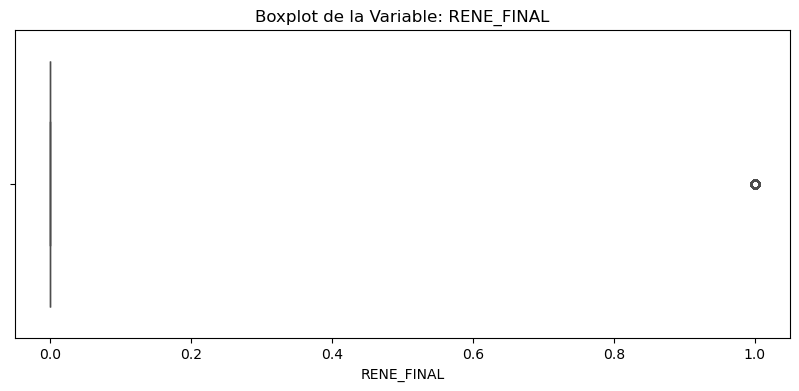

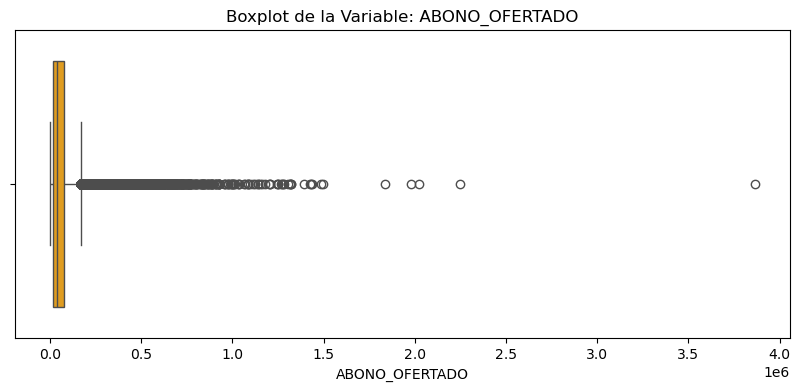

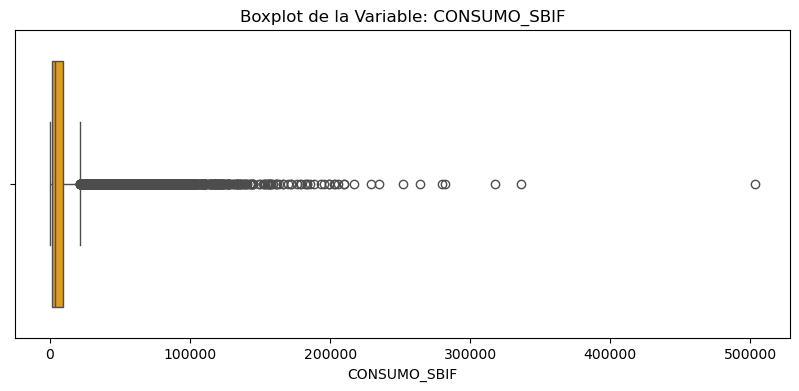

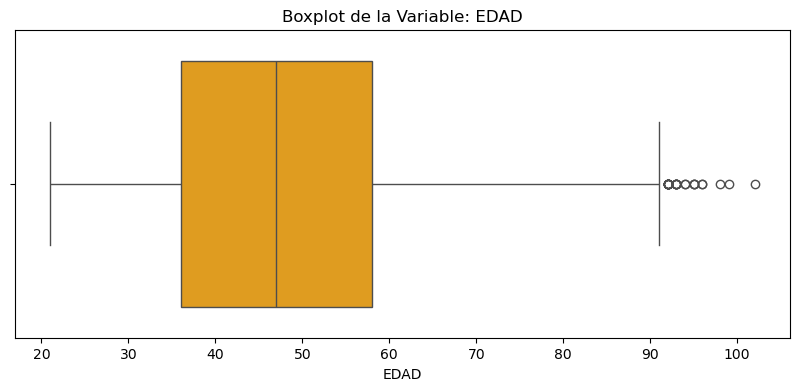

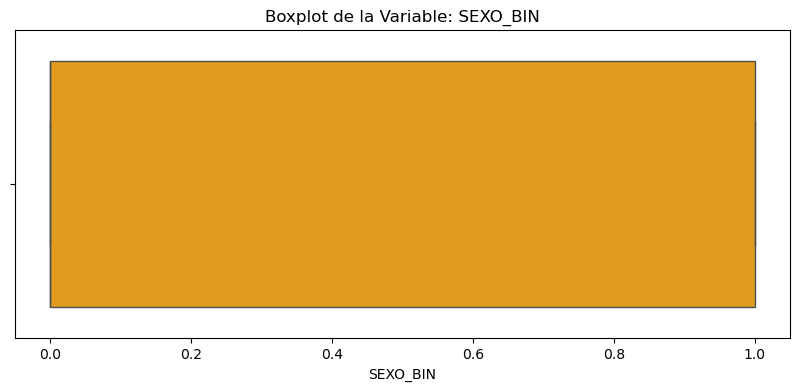

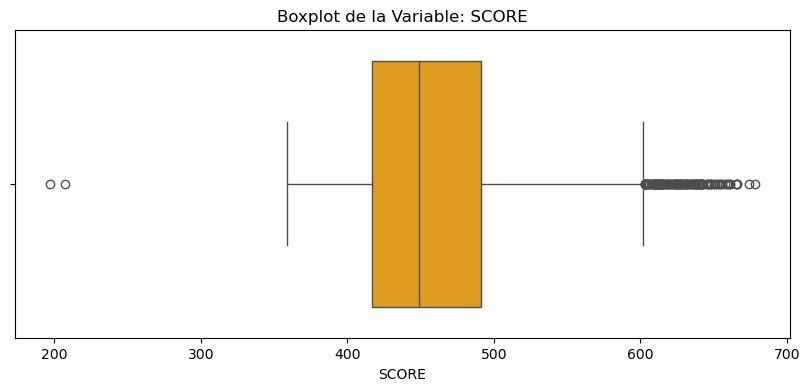

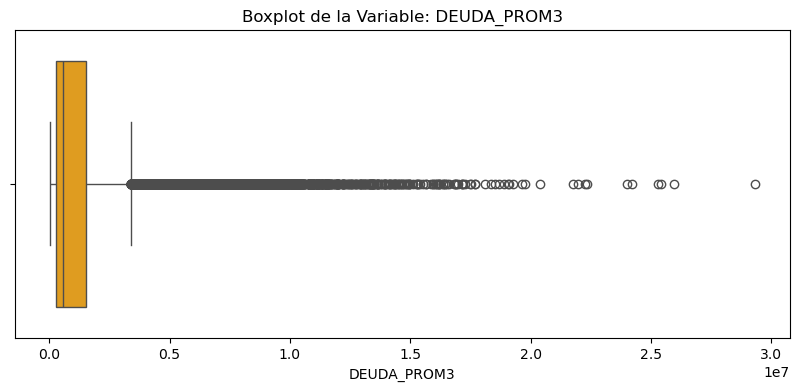

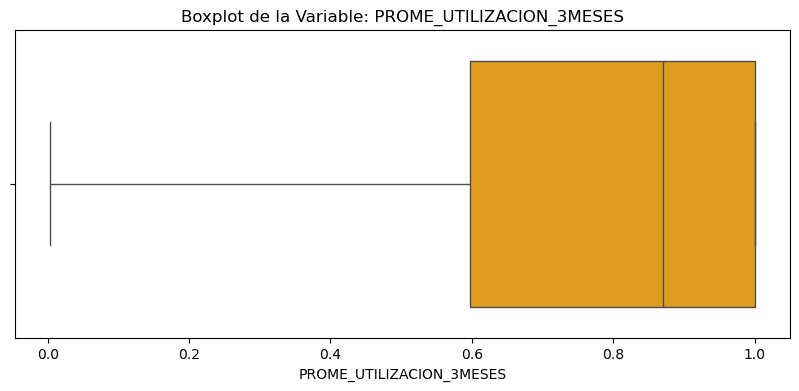

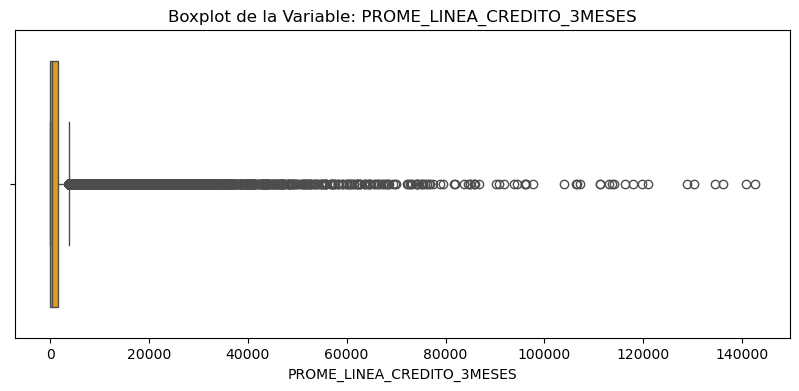

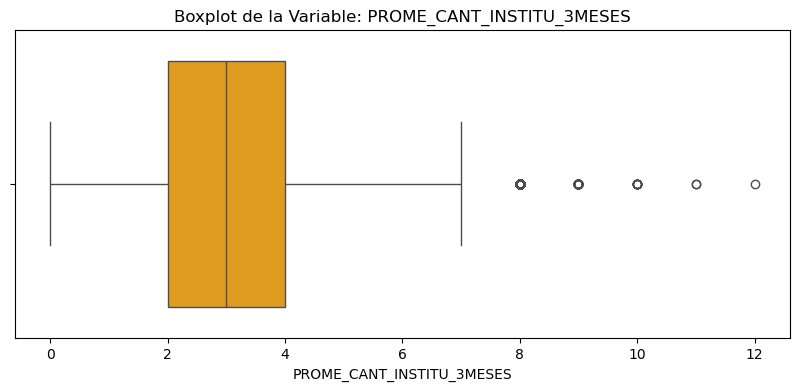

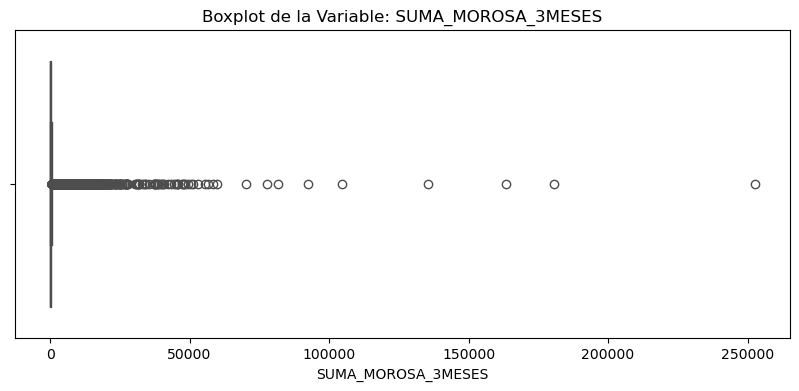

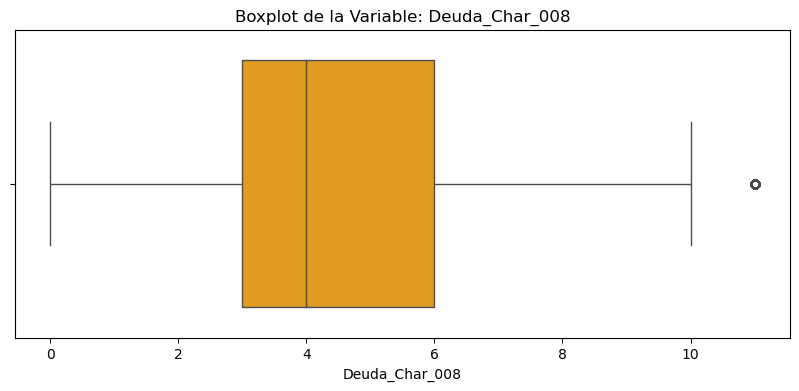

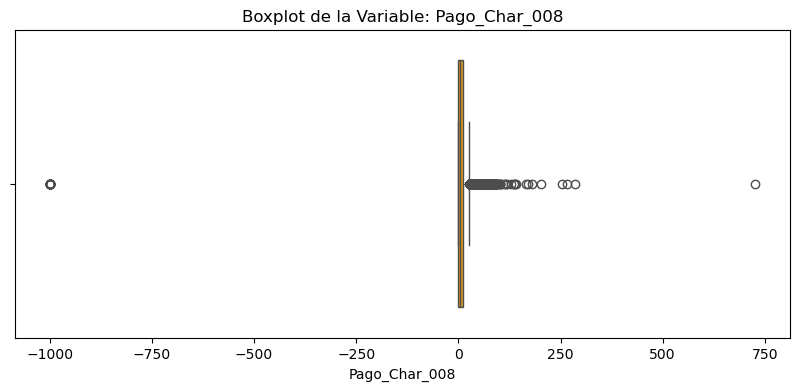

In [18]:
# Boxplots para detectar outliers en variables numéricas
for col in numerical_cols:
    # Verificar que la columna tenga solo valores numéricos y no tenga valores nulos
    if pd.api.types.is_numeric_dtype(data[col]) and data[col].notnull().all():
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[col], color='orange')
        plt.title(f'Boxplot de la Variable: {col}')
        plt.show()
    else:
        print(f"La columna '{col}' se omitió porque contiene valores no numéricos o nulos.")

In [19]:
best_tree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

In [20]:
import pickle

# Guardar el modelo de Bosque Aleatorio en un archivo .pkl
with open('../models/cliente-renegociador.pkl', 'wb') as file:
    pickle.dump(best_tree, file)


with open('../models/cliente-renegociador-scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [21]:
# Cargar el modelo y el scaler desde los archivos .pkl
with open('../models/cliente-renegociador.pkl', 'rb') as archivo_modelo:
    modelo = pickle.load(archivo_modelo)

with open('../models/cliente-renegociador-scaler.pkl', 'rb') as archivo_scaler:
    scaler = pickle.load(archivo_scaler)
    

In [22]:
X_train_balanced[:1]

,ABONO_OFERTADO,CONSUMO_SBIF,EDAD,SEXO_BIN,SCORE,DEUDA_PROM3,PROME_UTILIZACION_3MESES,PROME_LINEA_CREDITO_3MESES,PROME_CANT_INSTITU_3MESES,SUMA_MOROSA_3MESES,Deuda_Char_008,Pago_Char_008
12593,53000.0,9603,31.0,1.0,378,992387,1.0,594,3,436,1,0


In [27]:

X_train_balanced.dtypes

ABONO_OFERTADO                float64
CONSUMO_SBIF                    int64
EDAD                          float64
SEXO_BIN                      float64
SCORE                           int64
DEUDA_PROM3                     int64
PROME_UTILIZACION_3MESES      float64
PROME_LINEA_CREDITO_3MESES      int64
PROME_CANT_INSTITU_3MESES       int64
SUMA_MOROSA_3MESES              int64
Deuda_Char_008                  int64
Pago_Char_008                   int64
dtype: object

In [26]:
# Lista de características en el orden esperado por el modelo
columnas = X_train_balanced.columns.values

# Crear una lista para almacenar los valores ingresados por el usuario
valores_usuario = [12593, 9603, 53000, 31, 1, 378, 992387, 1 , 594, 3, 436, 10]


# Convertir los valores a un DataFrame con las columnas correctas
nueva_muestra = pd.DataFrame([valores_usuario], columns=columnas)

# Escalar las características utilizando el scaler cargado
nueva_muestra_scaled = scaler.transform(nueva_muestra)

# Realizar la predicción con el modelo cargado
prediccion = modelo.predict(nueva_muestra_scaled)
probabilidad = modelo.predict_proba(nueva_muestra_scaled)[:, 1]


print(f"Predicción: {prediccion}")
print(f"probabilidad: {probabilidad}")



Predicción: [0]
probabilidad: [0.41874259]


/opt/homebrew/Caskroom/miniforge/base/envs/uai310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/uai310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
